**1. Late night sports analysis**

*Problem:*
A regional sports network is currently paying editors and analysts overtime after each game to produce same-day video analysis for their web properties. This overtime is costly and while some videos do gain lots of views, others do not.

What factors influence the popularity of these videos produced and published immediately after games? Importantly, can some of the analysis wait until the next morning?

*Target Variable:*
Editorial Video Plays reported in Google Analytics for game related content posted after the game played between the end of the game and the next morning.

*Benefit:*
If we could predict the value of producing this video in terms of plays that same night, we could recommend for or against paying analysts overtime versus finishing the work in the morning.

*Features:*
We would want to consider at least:
- wins versus losses,
- the record of the teams entering the game,
- if the game went to an overtime,
- the score of the game,
- the category of the video,
- home v. away games,
- the date of the game.

*Goals:*
We aim to hold video plays steady while reducing overtime costs.

*Risks and limitations:*
It is not clear that these factors correlate with a difference in videos plays for same-day game related content. We will also need to use multiple data sets in order to add all of these factors. FiveThirtyEight Elo score would have been a great addition, but their dataset contains no data for this year.

There may also be a risk that other factors like individual player records being broken, in-game fights or off-court storylines play a large role in the popularity of videos. However, this system will be a tool for a more data-informed decision at the end of games and human decision making can take these factors into account.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

In [3]:
videos = pd.read_csv('./data/Knicks_Videos.csv')
videos.head()

,Date,Custom dimension 6,Custom dimension 13,Custom dimension 3,Custom dimension 10,Custom dimension 9,Custom dimension 1,Custom dimension 5,Total events
0,2018-10-17,New York Knicks,2017102719,Knicks vs Nets 2017-10-27,Celebrity Alumni Interview,Pre Game,Clyde's Memories of His First Game as a Knick,"Al Trautwig,Walt ""Clyde"" Frazier",1
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1
3,2018-10-17,New York Knicks,2018010319,Knicks at Pelicans 2017-12-30,Highlight Clip,Pre Game,Baker Takes an Elbow From Davis,"Bill Pidto,Wally Szczerbiak",1
4,2018-10-17,New York Knicks,2018010319,Knicks at Pelicans 2017-12-30,Highlight Clip,Pre Game,nyk-trier-post-100318,"Bill Pidto,Wally Szczerbiak",1


In [4]:
videos.tail()

,Date,Custom dimension 6,Custom dimension 13,Custom dimension 3,Custom dimension 10,Custom dimension 9,Custom dimension 1,Custom dimension 5,Total events
7195,2019-01-31,New York Knicks,2019013023,Knicks vs Mavericks 2019-01-30,Highlights Analysis,Postgame Show,Vintage Nowitzki Leads Mavericks Over Knicks,"Al Trautwig,Alan Hahn,Wally Szczerbiak",10
7196,2019-01-31,New York Knicks,2019013023,Knicks vs Mavericks 2019-01-30,Player Interview,Postgame Show,Doncic: Dirk is Amazing,"Al Trautwig,Alan Hahn,Wally Szczerbiak",1
7197,2019-01-31,New York Knicks,2019013111,Knicks vs Mavericks 2019-01-30,Player Interview,Postgame Show,Kanter on Kissing Knicks Logo on Court,Alan Hahn,1
7198,2019-01-31,New York Knicks,2019013111,Knicks vs Mavericks 2019-01-30,Segment,Postgame Show,Wally Wall: Luka Doncic is a Baller,Alan Hahn,4
7199,2019-01-31,New York Knicks,2019013120,Knicks vs Celtics 2019-02-01,Segment,Live Game,Full Details of Porzingis Trade,Bill Pidto,40


In [5]:
videos.dtypes

Date                   object
Custom dimension 6     object
Custom dimension 13     int64
Custom dimension 3     object
Custom dimension 10    object
Custom dimension 9     object
Custom dimension 1     object
Custom dimension 5     object
Total events            int64
dtype: object

In [6]:
videos.shape

(7200, 9)

In [7]:
videos.isnull().sum()

Date                   0
Custom dimension 6     0
Custom dimension 13    0
Custom dimension 3     0
Custom dimension 10    0
Custom dimension 9     0
Custom dimension 1     0
Custom dimension 5     0
Total events           0
dtype: int64

In [8]:
videos.columns = ['Date_Played', 'Team', 'Post_Date_Hour', 'Game_Tax', 'Video_Category', 'Linear_Post_Type', 'Video_Name', 'Personalities', 'Video_Plays']

videos.head()

,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays
0,2018-10-17,New York Knicks,2017102719,Knicks vs Nets 2017-10-27,Celebrity Alumni Interview,Pre Game,Clyde's Memories of His First Game as a Knick,"Al Trautwig,Walt ""Clyde"" Frazier",1
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1
3,2018-10-17,New York Knicks,2018010319,Knicks at Pelicans 2017-12-30,Highlight Clip,Pre Game,Baker Takes an Elbow From Davis,"Bill Pidto,Wally Szczerbiak",1
4,2018-10-17,New York Knicks,2018010319,Knicks at Pelicans 2017-12-30,Highlight Clip,Pre Game,nyk-trier-post-100318,"Bill Pidto,Wally Szczerbiak",1


In [9]:
Post_Videos = videos.loc[videos.loc[:, 'Linear_Post_Type'].str.contains('ost'), :]

Post_Videos.head()

,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1
7,2018-10-17,New York Knicks,2018012401,Knicks at Lakers 2018-01-21,Highlight Package,Post Game,Baby Race on the Hardwood!,Bill Pidto,1
11,2018-10-17,New York Knicks,2018020415,Knicks vs Hawks 2018-02-04,Highlights Analysis,Post Game,Breaking Down Knicks' Final Shot,"Alan Hahn,Wally Szczerbiak",1
20,2018-10-17,New York Knicks,2018040922,Knicks vs Cavaliers 2018-04-09,Player Interview,Post Game,Ntilikina Surprises Young Lady With Scholarship,Rebecca Haarlow,1


In [10]:
Post_Videos.loc[:, 'Post_Date_Hour'] = Post_Videos.loc[:, 'Post_Date_Hour'].astype('str')

Post_Videos.dtypes

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Date_Played         object
Team                object
Post_Date_Hour      object
Game_Tax            object
Video_Category      object
Linear_Post_Type    object
Video_Name          object
Personalities       object
Video_Plays          int64
dtype: object

In [11]:
Post_Videos.loc[:, 'Post_Date'] = Post_Videos.loc[:, 'Post_Date_Hour'].str.slice(0,8)
Post_Videos.loc[:, 'Post_Hour'] = Post_Videos.loc[:, 'Post_Date_Hour'].str.slice(8,10)

Post_Videos.head()

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1,20171105,22
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1,20171204,22
7,2018-10-17,New York Knicks,2018012401,Knicks at Lakers 2018-01-21,Highlight Package,Post Game,Baby Race on the Hardwood!,Bill Pidto,1,20180124,01
11,2018-10-17,New York Knicks,2018020415,Knicks vs Hawks 2018-02-04,Highlights Analysis,Post Game,Breaking Down Knicks' Final Shot,"Alan Hahn,Wally Szczerbiak",1,20180204,15
20,2018-10-17,New York Knicks,2018040922,Knicks vs Cavaliers 2018-04-09,Player Interview,Post Game,Ntilikina Surprises Young Lady With Scholarship,Rebecca Haarlow,1,20180409,22


In [12]:
Post_Videos.loc[:, 'Game_Date'] = Post_Videos.loc[:, 'Game_Tax'].str.slice(-10,)

Post_Videos.head()

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour,Game_Date
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1,20171105,22,2017-11-05
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1,20171204,22,2017-12-04
7,2018-10-17,New York Knicks,2018012401,Knicks at Lakers 2018-01-21,Highlight Package,Post Game,Baby Race on the Hardwood!,Bill Pidto,1,20180124,01,2018-01-21
11,2018-10-17,New York Knicks,2018020415,Knicks vs Hawks 2018-02-04,Highlights Analysis,Post Game,Breaking Down Knicks' Final Shot,"Alan Hahn,Wally Szczerbiak",1,20180204,15,2018-02-04
20,2018-10-17,New York Knicks,2018040922,Knicks vs Cavaliers 2018-04-09,Player Interview,Post Game,Ntilikina Surprises Young Lady With Scholarship,Rebecca Haarlow,1,20180409,22,2018-04-09


In [13]:
Post_Videos.loc[:, 'Game_Detail'] = Post_Videos.loc[:, 'Game_Tax'].str.slice(0,-11)

Post_Videos.head()

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour,Game_Date,Game_Detail
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1,20171105,22,2017-11-05,Knicks vs Pacers
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1,20171204,22,2017-12-04,Knicks at Pacers
7,2018-10-17,New York Knicks,2018012401,Knicks at Lakers 2018-01-21,Highlight Package,Post Game,Baby Race on the Hardwood!,Bill Pidto,1,20180124,01,2018-01-21,Knicks at Lakers
11,2018-10-17,New York Knicks,2018020415,Knicks vs Hawks 2018-02-04,Highlights Analysis,Post Game,Breaking Down Knicks' Final Shot,"Alan Hahn,Wally Szczerbiak",1,20180204,15,2018-02-04,Knicks vs Hawks
20,2018-10-17,New York Knicks,2018040922,Knicks vs Cavaliers 2018-04-09,Player Interview,Post Game,Ntilikina Surprises Young Lady With Scholarship,Rebecca Haarlow,1,20180409,22,2018-04-09,Knicks vs Cavaliers


In [14]:
Post_Videos.loc[:, 'Opponent'] = Post_Videos.loc[:, 'Game_Detail'].str.slice(9,)

Post_Videos.head()

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour,Game_Date,Game_Detail,Opponent
1,2018-10-17,New York Knicks,2017110522,Knicks vs Pacers 2017-11-05,Player Interview,Post Game,Porzingis: We're Playing With That New York Grit,Rebecca Haarlow,1,20171105,22,2017-11-05,Knicks vs Pacers,Pacers
2,2018-10-17,New York Knicks,2017120422,Knicks at Pacers 2017-12-04,Segment,Post Game,Dunk of the Year Contender From a High Schooler,Bill Pidto,1,20171204,22,2017-12-04,Knicks at Pacers,Pacers
7,2018-10-17,New York Knicks,2018012401,Knicks at Lakers 2018-01-21,Highlight Package,Post Game,Baby Race on the Hardwood!,Bill Pidto,1,20180124,01,2018-01-21,Knicks at Lakers,Lakers
11,2018-10-17,New York Knicks,2018020415,Knicks vs Hawks 2018-02-04,Highlights Analysis,Post Game,Breaking Down Knicks' Final Shot,"Alan Hahn,Wally Szczerbiak",1,20180204,15,2018-02-04,Knicks vs Hawks,Hawks
20,2018-10-17,New York Knicks,2018040922,Knicks vs Cavaliers 2018-04-09,Player Interview,Post Game,Ntilikina Surprises Young Lady With Scholarship,Rebecca Haarlow,1,20180409,22,2018-04-09,Knicks vs Cavaliers,Cavaliers


In [15]:
Same_Day_Post_Videos = Post_Videos.loc[Post_Videos.loc[:, 'Game_Date'] == Post_Videos.loc[:, 'Date_Played'], :]

Same_Day_Post_Videos.head()

,Date_Played,Team,Post_Date_Hour,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour,Game_Date,Game_Detail,Opponent
128,2018-10-17,New York Knicks,2018101722,Knicks vs Hawks 2018-10-17,Feature,Post Game,Who's Your Starting Five?,Rebecca Haarlow,1,20181017,22,2018-10-17,Knicks vs Hawks,Hawks
129,2018-10-17,New York Knicks,2018101722,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Fizdale Goes Over Decision to Start Ntilikina,"Al Trautwig,Alan Hahn,Wally Szczerbiak",3,20181017,22,2018-10-17,Knicks vs Hawks,Hawks
130,2018-10-17,New York Knicks,2018101722,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,"Al Trautwig,Alan Hahn,Wally Szczerbiak",11,20181017,22,2018-10-17,Knicks vs Hawks,Hawks
131,2018-10-17,New York Knicks,2018101722,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,"Alan Hahn,Wally Szczerbiak",1,20181017,22,2018-10-17,Knicks vs Hawks,Hawks
132,2018-10-17,New York Knicks,2018101722,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,Rebecca Haarlow,3,20181017,22,2018-10-17,Knicks vs Hawks,Hawks


In [68]:
Video_Name_Sum = Same_Day_Post_Videos.groupby('Video_Name')['Video_Plays'].sum()
Video_Name_Sum

Video_Name
"Fiz Kids" Battle Hard, But Come Up Short: Highlights & Analysis     10
3rd-Quarter Surge Lifts Knicks to Win: Highlight & Analysis          42
3rd-Quarter Surge Lifts Knicks: Highlight & Analysis                  1
A Shocked Kanter Learns He Was Ejected In Post Game Interview         1
A Taste of New Jersey                                                 1
Alan & Wally One-on-One: Who's the NBA MVP So Far?                    1
Allen Reacts After Solid Knicks Debut                                 3
An Update on Kristaps Porzingis                                       8
Audible: Odell Beckham Jr. & Marquise Goodwin Share a Moment          1
Audible: You Can't Stop Saquon Barkley!                               1
BUF_DAHLIN_HIGHLIGHTS_101318                                          4
Beal Gives Trier His Respect                                          1
Beauvillier Shines in Isles' Win: Highlights & Analysis               1
Beckham on Continued Trouble in the Red Zone         

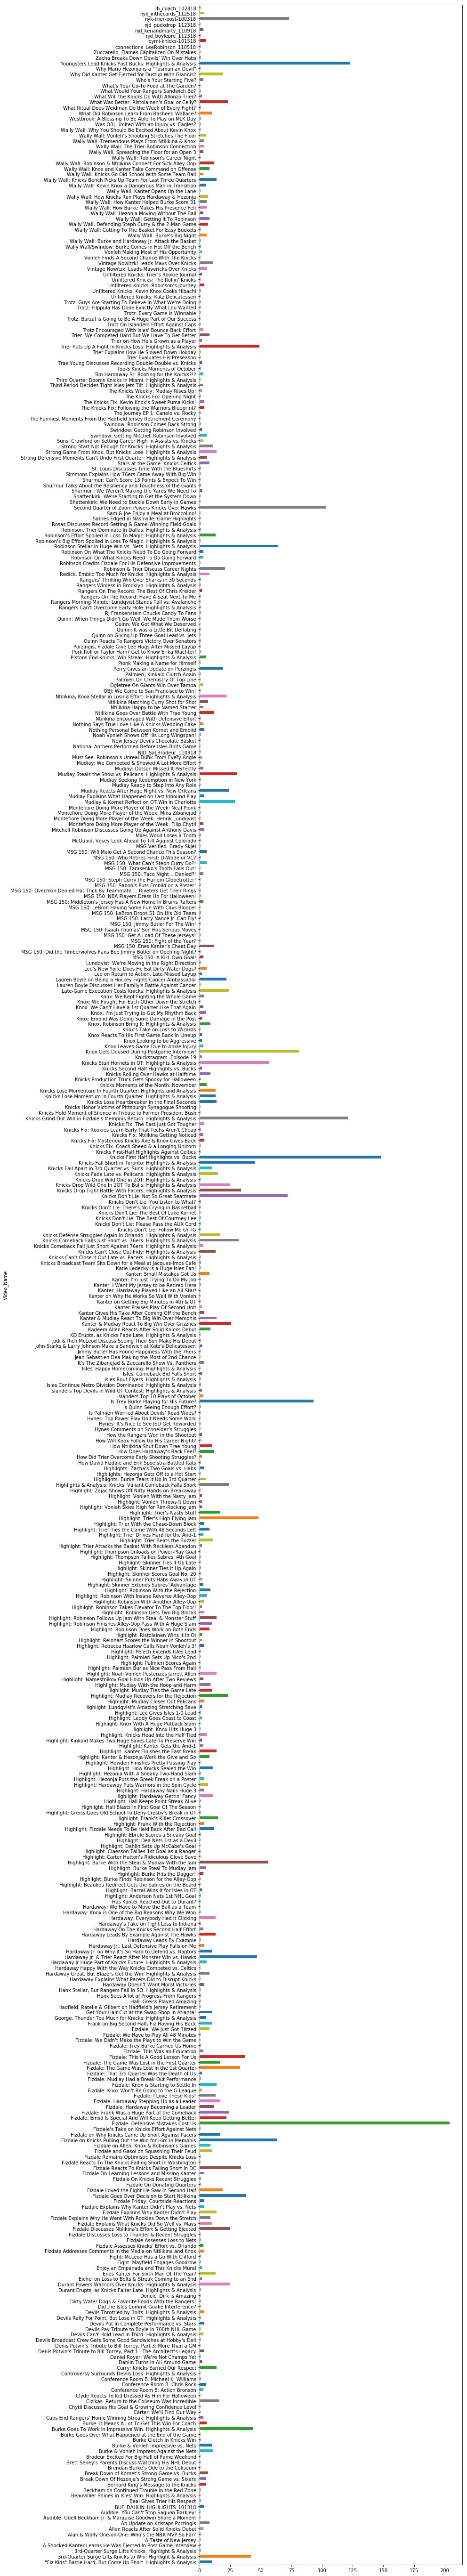

In [66]:
ax = Video_Name_Sum.plot(kind='BarH', x='Video_Name', y='Video_Plays', figsize=(10,100))

In [67]:
Video_Name_Sum.describe()

count    461.000000
mean       7.986985
std       18.478067
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      204.000000
Name: Video_Plays, dtype: float64

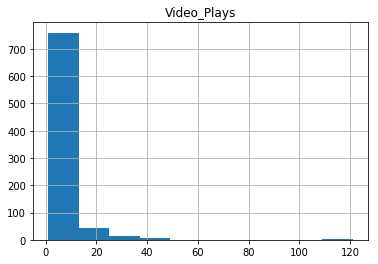

In [18]:
Same_Day_Post_Videos.hist();

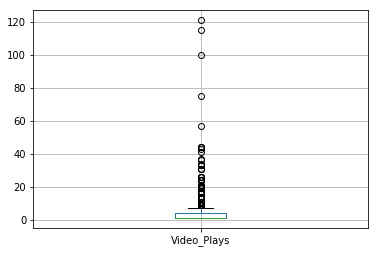

In [19]:
Same_Day_Post_Videos.boxplot();

In [20]:
Same_Day_Post_Videos.loc[:, 'Game_Date'] = pd.to_datetime(Same_Day_Post_Videos.loc[:, 'Game_Date'], format='%Y-%m-%d')

Same_Day_Post_Videos.dtypes

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Date_Played                 object
Team                        object
Post_Date_Hour              object
Game_Tax                    object
Video_Category              object
Linear_Post_Type            object
Video_Name                  object
Personalities               object
Video_Plays                  int64
Post_Date                   object
Post_Hour                   object
Game_Date           datetime64[ns]
Game_Detail                 object
Opponent                    object
dtype: object

In [26]:
Games_Data = pd.read_csv('./data/Knicks_Results.csv')
Games_Data.head()

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak,Streak_Clean
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,126,107,19,1,0,1,W 1,1
1,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,105,107,-2,1,1,0,L 1,-1
2,3,Sat Oct 20 2018,7:30p,NaN,0,Celtics,L,1,1,0,101,103,-2,1,2,-1,L 2,-2
3,4,Mon Oct 22 2018,8:00p,@,1,Bucks,L,1,1,0,113,124,-11,1,3,-2,L 3,-3
4,5,Wed Oct 24 2018,7:30p,@,1,Heat,L,1,1,0,87,110,-23,1,4,-3,L 4,-4


In [27]:
Opponent_Elo = pd.read_csv('./data/MSGN_Carmello_Elo.csv')
Opponent_Elo.head()

,Elo,Team,Record,Playoffs,Finals,Champion
0,1802,Warriors,61-21,>99%,74%,61%
1,1696,Thunder,53-29,>99%,13%,8%
2,1690,Raptors,59-23,>99%,37%,12%
3,1678,Rockets,50-32,99%,6%,3%
4,1672,Celtics,53-29,>99%,20%,4%


In [28]:
Opponent_Elo.columns = ['Elo', 'Opponent', 'Opponent_Record', 'Playoffs', 'Finals', 'Champion']

Opponent_Elo.head()

,Elo,Opponent,Opponent_Record,Playoffs,Finals,Champion
0,1802,Warriors,61-21,>99%,74%,61%
1,1696,Thunder,53-29,>99%,13%,8%
2,1690,Raptors,59-23,>99%,37%,12%
3,1678,Rockets,50-32,99%,6%,3%
4,1672,Celtics,53-29,>99%,20%,4%


In [29]:
Game_Data_Elo = pd.merge(Games_Data, Opponent_Elo)

Game_Data_Elo.head()

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,...,Total_Wins,Total_Loss,Record_Net,Streak,Streak_Clean,Elo,Opponent_Record,Playoffs,Finals,Champion
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,1,0,1,W 1,1,1340,27-55,<1%,<1%,<1%
1,12,Wed Nov 7 2018,7:30p,@,1,Hawks,W,0,1,0,...,4,8,-4,W 1,1,1340,27-55,<1%,<1%,<1%
2,34,Fri Dec 21 2018,7:30p,NaN,0,Hawks,L,1,1,0,...,9,25,-16,L 4,-4,1340,27-55,<1%,<1%,<1%
3,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,...,1,1,0,L 1,-1,1466,39-43,83%,<1%,<1%
4,7,Mon Oct 29 2018,7:30p,NaN,0,Nets,W,0,1,0,...,2,5,-3,W 1,1,1466,39-43,83%,<1%,<1%


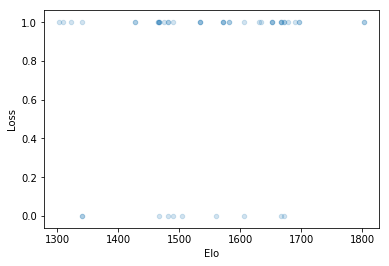

In [30]:
Game_Data_Elo.plot(kind='Scatter', x='Elo', y='Loss', alpha=.2);

In [31]:
Game_Data_Elo.loc[:, 'Game_Date'] = pd.to_datetime(Game_Data_Elo.loc[:, 'Date'], format='%a %b %d %Y')

Game_Data_Elo.head()

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,...,Total_Loss,Record_Net,Streak,Streak_Clean,Elo,Opponent_Record,Playoffs,Finals,Champion,Game_Date
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,0,1,W 1,1,1340,27-55,<1%,<1%,<1%,2018-10-17
1,12,Wed Nov 7 2018,7:30p,@,1,Hawks,W,0,1,0,...,8,-4,W 1,1,1340,27-55,<1%,<1%,<1%,2018-11-07
2,34,Fri Dec 21 2018,7:30p,NaN,0,Hawks,L,1,1,0,...,25,-16,L 4,-4,1340,27-55,<1%,<1%,<1%,2018-12-21
3,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,...,1,0,L 1,-1,1466,39-43,83%,<1%,<1%,2018-10-19
4,7,Mon Oct 29 2018,7:30p,NaN,0,Nets,W,0,1,0,...,5,-3,W 1,1,1466,39-43,83%,<1%,<1%,2018-10-29


In [32]:
Full_Game_Video = pd.merge(Game_Data_Elo, Same_Day_Post_Videos, on='Game_Date')

Full_Game_Video.head()

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent_x,Win_Loss,Loss,Loss_n-1,Overtime,...,Game_Tax,Video_Category,Linear_Post_Type,Video_Name,Personalities,Video_Plays,Post_Date,Post_Hour,Game_Detail,Opponent_y
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,Knicks vs Hawks 2018-10-17,Feature,Post Game,Who's Your Starting Five?,Rebecca Haarlow,1,20181017,22,Knicks vs Hawks,Hawks
1,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Fizdale Goes Over Decision to Start Ntilikina,"Al Trautwig,Alan Hahn,Wally Szczerbiak",3,20181017,22,Knicks vs Hawks,Hawks
2,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,"Al Trautwig,Alan Hahn,Wally Szczerbiak",11,20181017,22,Knicks vs Hawks,Hawks
3,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,"Alan Hahn,Wally Szczerbiak",1,20181017,22,Knicks vs Hawks,Hawks
4,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,Knicks vs Hawks 2018-10-17,Highlight Clip,Post Game,Highlight: Frank's Killer Crossover,Rebecca Haarlow,3,20181017,22,Knicks vs Hawks,Hawks


In [33]:
Full_Game_Video.shape

(825, 37)

In [34]:
Full_Game_Video.dtypes

Game_Index                   int64
Date                        object
Start_Time                  object
Away_Old                    object
Away                         int64
Opponent_x                  object
Win_Loss                    object
Loss                         int64
Loss_n-1                     int64
Overtime                     int64
Tm_Score                     int64
Opp_Score                    int64
Score_Net                    int64
Total_Wins                   int64
Total_Loss                   int64
Record_Net                   int64
Streak                      object
Streak_Clean                 int64
Elo                          int64
Opponent_Record             object
Playoffs                    object
Finals                      object
Champion                    object
Game_Date           datetime64[ns]
Date_Played                 object
Team                        object
Post_Date_Hour              object
Game_Tax                    object
Video_Category      

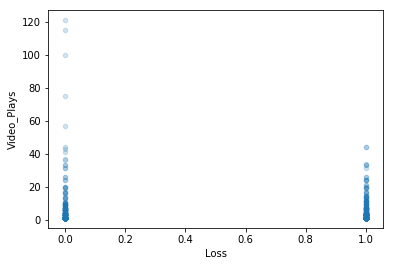

In [35]:
Full_Game_Video.plot(kind='Scatter', x='Loss', y='Video_Plays', alpha=.2);

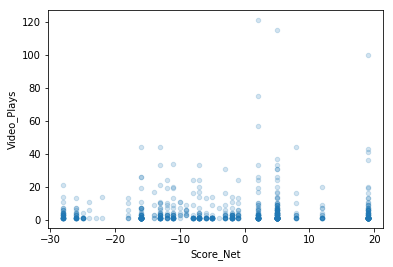

In [36]:
Full_Game_Video.plot(kind='Scatter', x='Score_Net', y='Video_Plays', alpha=.2);

C:\Users\mail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


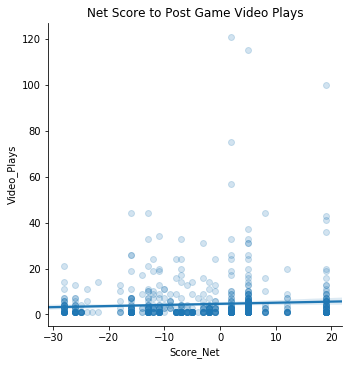

In [37]:
g = sns.lmplot(x='Score_Net',
               y='Video_Plays',
               data=Full_Game_Video,
               scatter_kws={'alpha':0.2},
               );
g.ax.set_title('Net Score to Post Game Video Plays');

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

feature_cols = ['Score_Net']

X = Full_Game_Video.loc[:, feature_cols]
y = Full_Game_Video.loc[:, 'Video_Plays']

lr.fit(X, y)

print(lr.intercept_)
print(lr.coef_)

4.613339213552087
[0.04821339]


In [34]:
from sklearn.linear_model import LinearRegression

lr_2 = LinearRegression()

feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']

X = Full_Game_Video.loc[:, feature_cols]
y = Full_Game_Video.loc[:, 'Video_Plays']

lr_2.fit(X, y)

print(lr_2.intercept_)
print(lr_2.coef_)

10.229153338566608
[-0.02825414 -2.31087642  1.61864306 -0.46167808 -0.11418823 -0.06059858
 -0.00344491]


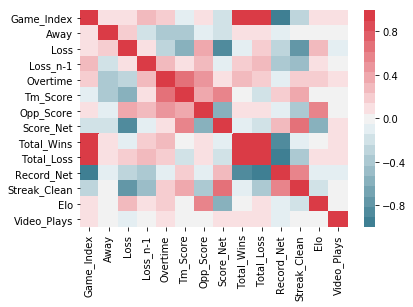

In [35]:
sns.heatmap(Full_Game_Video.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1, 11):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    score = np.mean(-cross_val_score(lr_2, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)

1 92.84022713193194
2 94.41051535058516
3 95.50374399575307
4 99.38091613577441
5 98.07414761283987
6 97.30315776635727
7 95.09084269961575
8 97.83057644200308
9 103.0822626563915
10 95.67177214034571


In [37]:
kf = KFold(n_splits=5, shuffle=True)

np.mean(-cross_val_score(lr_2, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))

148.1309154800568

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def train_test_MSGN(df, feature_cols):
    X = df.loc[:, feature_cols]
    y = df.loc[:, 'Video_Plays']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    lr_2.fit(X_train, y_train)
    
    y_pred = lr_2.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']))
print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime', 'Record_Net', 'Streak_Clean']))
print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime']))

10.022203425855315
10.031722732015968
10.850405393808582


In [44]:
pd.get_dummies(Full_Game_Video, columns=['Video_Category'], drop_first=True)


,Game_Index,Date,Start_Time,Away_Old,Away,Opponent_x,Win_Loss,Loss,Loss_n-1,Overtime,...,Post_Date,Post_Hour,Game_Detail,Opponent_y,Video_Category_Feature,Video_Category_Highlight Clip,Video_Category_Highlight Package,Video_Category_Highlights Analysis,Video_Category_Player Interview,Video_Category_Segment
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,1,0,0,0,0,0
1,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
2,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
3,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
4,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
5,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
6,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
7,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
8,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
9,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,20181017,22,Knicks vs Hawks,Hawks,0,1,0,0,0,0
